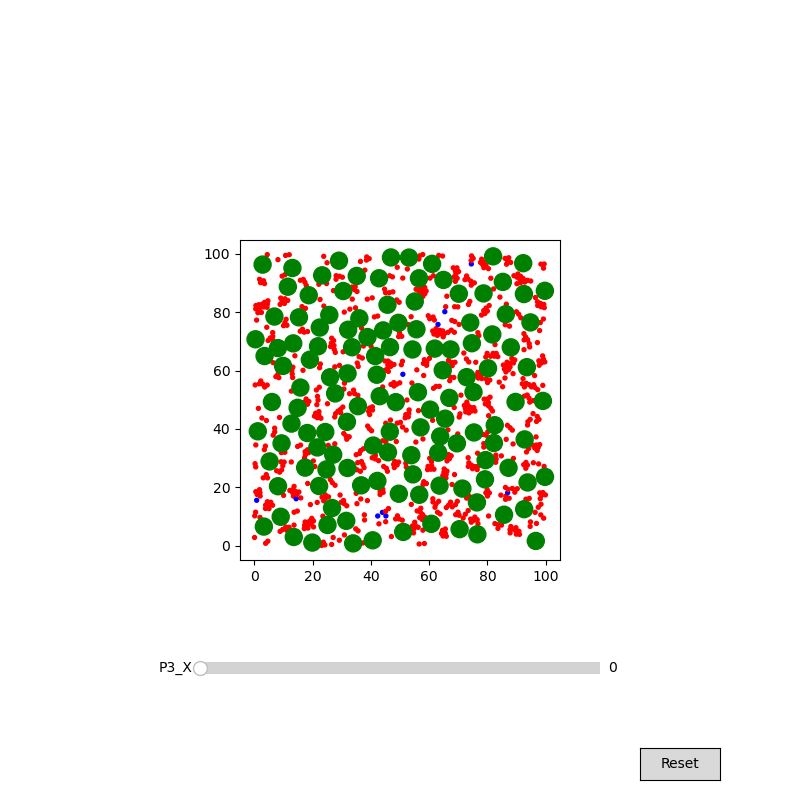

In [13]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from matplotlib.widgets import Slider, Button

c_pick = ['b','r','g']

p_type = []
x = []
y = []
c_list = []

r_index = 0

#Total_particles = 112+1
#Total_particles = 110+2
#Total_particles = 105+4

#Total_particles = 939+32
#Total_particles = 1000+1

Total_particles = 750+128

with open("Research_Data/Data_Size_5_Fixed/Output_128/Position15.txt", 'r') as f:
#with open("C:/Users/david/OneDrive/Desktop/output/Position_4.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)

for i in range(Total_particles):
    row = rows[i]
    p_type.append(int(row[0]))
    x.append(np.float32(row[1]))
    y.append(np.float32(row[2]))
    c_list.append(c_pick[int(row[0])])

size = []

for i in range(0,len(x)):
    if (p_type[i] == 2):
        size.append(150)
    elif (p_type[i] == 1):
        size.append(8)
    else:
        size.append(8)
            
plt.rcParams["figure.figsize"] = (8,8)          
            
fig = plt.figure()
ax = fig.add_subplot()
            
ax.scatter(x, y, s = size, c = c_list)

#adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.3, bottom=0.3, right=0.7, top=0.7)

# Make a horizontal slider to control P3 X.
axfreq = fig.add_axes([0.25, 0.15, 0.5, 0.03])
p3x_slider = Slider(
    ax=axfreq,
    label='P3_X',
    valmin=0,
    valmax=1000,
    valinit=0,
)

# The function to be called anytime a slider's value changes
def update(val):

    r_index = np.floor(p3x_slider.val / 1.0)

    r_index = r_index * Total_particles

    for i in range(0,Total_particles):
        row = rows[int(r_index) + i]
        p_type[i] = int(row[0])
        x[i] = np.float32(row[1])
        y[i] = np.float32(row[2])
        c_list[i] = c_pick[int(row[0])]

    for i in range(0,len(x)):
        if (p_type[i] == 2):
            size[i] = 150
        elif (p_type[i] == 1):
            size[i] = 8
        else:
            size[i] = 8

    ax.clear()
    ax.scatter(x, y, s = size, c = c_list)
    fig.canvas.draw_idle()

# register the update function with each slider
p3x_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    p3x_slider.reset()
    
button.on_clicked(reset)

plt.show()

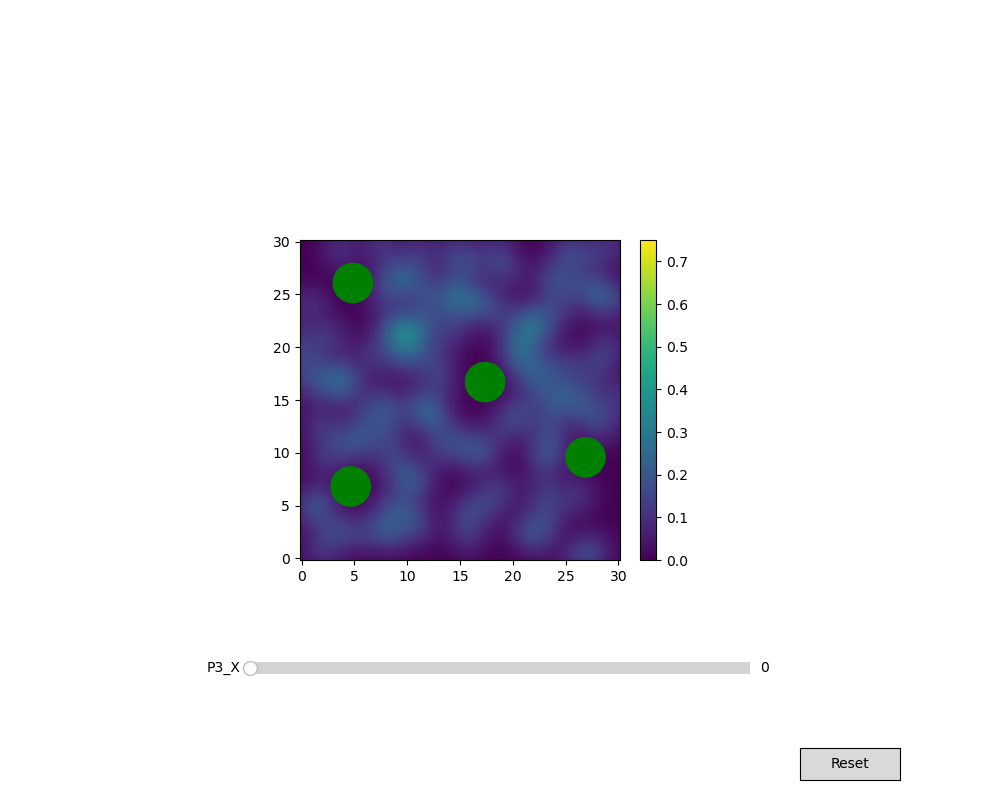

In [4]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from matplotlib.widgets import Slider, Button

c_pick = ['b','r','g']

p_type = []
x = []
y = []
c_list = []

p_type_coll = []
x_coll = []
y_coll = []
c_list_coll = []

x_field_part = []
y_field_part = []

r_index = 0

#Total_particles = 112+1
#Total_particles = 110+2
Total_particles = 105+4

#with open("Research_Data/Data_Size_5_Fixed/Output_128/Position84.txt", 'r') as f:
with open("source/repos/Particle_Simulation/out/build/x64-release/output/Position_4.txt", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)

for i in range(r_index,r_index + Total_particles):         
    row = rows[i]
    
    if int(row[0])==2: 
        p_type_coll.append(int(row[0]))
        x_coll.append(np.float32(row[1]))
        y_coll.append(np.float32(row[2]))
        c_list_coll.append(c_pick[int(row[0])])
    else:
        p_type.append(int(row[0]))
        x.append(np.float32(row[1]))
        y.append(np.float32(row[2]))
        c_list.append(c_pick[int(row[0])])

        x_field_part.append(np.float32(row[1]))
        y_field_part.append(np.float32(row[2]))

size = []
size_coll = []

for i in range(0,len(x)):
    size.append(30)

for i in range(0,len(x_coll)):
    size_coll.append(800)

v = 2
pre_v = 1/(2*np.pi*v) # squared because we ahve 2 normals
inv_v = 1/v

# use normal random variables to estimate density
def density_normal(x_p,y_p,c_x, c_y):
    return pre_v*np.exp(-0.5*inv_v*(x_p-c_x)**2-0.5*inv_v*(y_p-c_y)**2)

x_s = 100
y_s = 100

x_grid, y_grid = np.meshgrid(np.linspace(0, 30, x_s), np.linspace(0, 30, y_s))

z_grid = np.zeros((x_s,y_s))

for i in range(0,x_s):
    for j in range(0,y_s):
        for k in range(0, len(x)):
            z_grid[i,j] += density_normal(x_grid[i,j],y_grid[i,j],x[k], y[k])
            
plt.rcParams["figure.figsize"] = (10,8)          
            
fig = plt.figure()
ax = fig.add_subplot()

c=ax.pcolormesh(x_grid, y_grid, z_grid, clim=(0, 0.75))
            
#ax.scatter(x, y, s = size, c = c_list)
ax.scatter(x_coll, y_coll, s = size_coll, c = c_list_coll)

fig.colorbar(c, ax=ax)

#adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.3, bottom=0.3, right=0.7, top=0.7)

# Make a horizontal slider to control P3 X.
axfreq = fig.add_axes([0.25, 0.15, 0.5, 0.03])
p3x_slider = Slider(
    ax=axfreq,
    label='P3_X',
    valmin=0,
    valmax=3500,
    valinit=0,
)

# The function to be called anytime a slider's value changes
def update(val):

    r_index = np.floor(p3x_slider.val / 1.0)

    r_index = r_index * Total_particles

    c_i = 0
    p_i = 0

    for i in range(0,Total_particles):   
        row = rows[int(r_index) + i]

        if int(row[0])==2:  
            p_type_coll[c_i] = int(row[0])
            x_coll[c_i] = np.float32(row[1])
            y_coll[c_i] = np.float32(row[2])
            c_list_coll[c_i] = c_pick[int(row[0])]

            c_i = c_i + 1
        else:
            p_type[p_i] = int(row[0])
            x[p_i] = np.float32(row[1])
            y[p_i] = np.float32(row[2])
            c_list[p_i] = c_pick[int(row[0])]
            
            x_field_part[p_i] = np.float32(row[1])
            y_field_part[p_i] = np.float32(row[2])

            p_i = p_i + 1

    z_grid = np.zeros((x_s,y_s))

    for i in range(0,x_s):
        for j in range(0,y_s):
            for k in range(0, len(x)):
                z_grid[i,j] += density_normal(x_grid[i,j],y_grid[i,j],x[k], y[k])
                
    ax.clear()

    ax.pcolormesh(x_grid, y_grid, z_grid, clim=(0, 0.75))
    ax.scatter(x, y, s = size, c = c_list)
    ax.scatter(x_coll, y_coll, s = size_coll, c = c_list_coll)

    fig.canvas.draw_idle()

# register the update function with each slider
p3x_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(event):
    p3x_slider.reset()
    
button.on_clicked(reset)

plt.show()